In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/importlib/_bootstra

In [2]:
df = pd.read_csv('~/Downloads/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


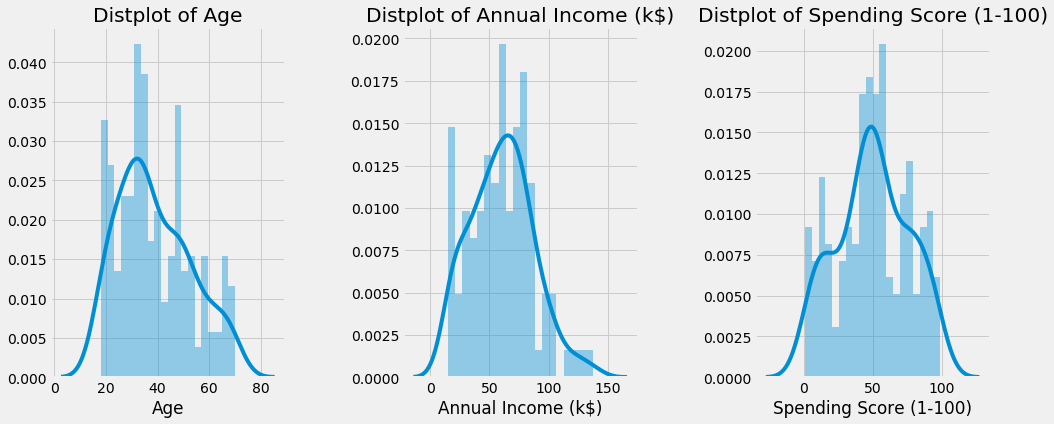

In [7]:
plt.style.use('fivethirtyeight')

plt.figure(1, figsize = (15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [8]:
df['Gender_Bin'] = LabelEncoder().fit_transform(df[['Gender']])
df = df.drop(['Gender'], axis = 1)

In [9]:
df.rename(columns = {'Annual Income (k$)': "Annual_Income", 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

In [10]:
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [13]:
k = range(1,15)
inertia = []

for i in k:
    model = KMeans(n_clusters = i)
    model.fit(df.drop(['CustomerID'],axis=1))
    inertia.append(model.inertia_)
    
print(inertia)

[308862.06000000006, 212889.44245524294, 143391.59236035674, 104414.67534220174, 75399.61541401486, 58348.64136331504, 51165.184237107904, 44391.82080487078, 40670.989962363215, 37295.808965663964, 34505.96485669503, 31942.275423228137, 29700.575153087637, 28605.61620950888]


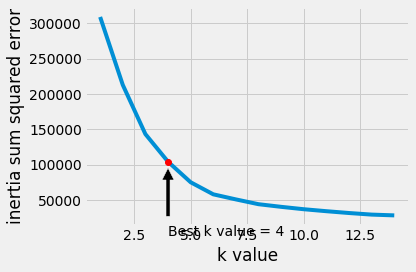

In [17]:
plt.plot(k, inertia)
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.plot(k[3], inertia[3], 'ro')
plt.annotate('Best k value = 4',xy=(k[3], inertia[3]), xytext = (4,50), arrowprops = dict(facecolor='black', 
                                                                                          shrink = 0.1))
plt.tight_layout()

In [18]:
model2 = KMeans(n_clusters = 4, max_iter = 10000)
model2.fit(df.drop(['CustomerID'], axis=1))

KMeans(max_iter=10000, n_clusters=4)

In [20]:
model2.labels_

array([3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [21]:
df['Cluster'] = model2.predict(df.drop(['CustomerID'], axis = 1))
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin,Cluster
0,1,19,15,39,1,3
1,2,21,15,81,1,3
2,3,20,16,6,0,1
3,4,23,16,77,0,3
4,5,31,17,40,0,1


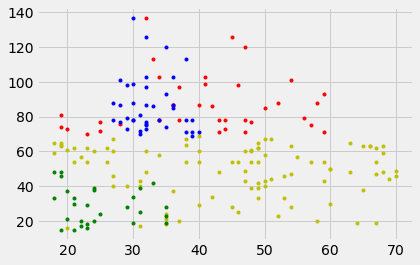

In [22]:
plt.plot(df['Age'][df['Cluster'] == 0], df['Annual_Income'][df['Cluster'] == 0], 'r.')
plt.plot(df['Age'][df['Cluster'] == 1], df['Annual_Income'][df['Cluster'] == 1], 'y.')
plt.plot(df['Age'][df['Cluster'] == 2], df['Annual_Income'][df['Cluster'] == 2], 'b.')
plt.plot(df['Age'][df['Cluster'] == 3], df['Annual_Income'][df['Cluster'] == 3], 'g.')

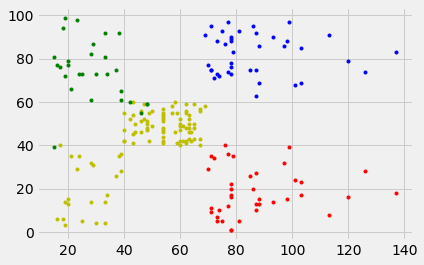

In [39]:
plt.plot(df['Annual_Income'][df['Cluster'] == 0], df['Spending_Score'][df['Cluster'] == 0], 'r.')
plt.plot(df['Annual_Income'][df['Cluster'] == 1], df['Spending_Score'][df['Cluster'] == 1], 'y.')
plt.plot(df['Annual_Income'][df['Cluster'] == 2], df['Spending_Score'][df['Cluster'] == 2], 'b.')
plt.plot(df['Annual_Income'][df['Cluster'] == 3], df['Spending_Score'][df['Cluster'] == 3], 'g.')

In [24]:
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin,Cluster
0,1,19,15,39,1,3
1,2,21,15,81,1,3
2,3,20,16,6,0,1
3,4,23,16,77,0,3
4,5,31,17,40,0,1


In [33]:
model2.fit(df.drop(['CustomerID', 'Age', 'Gender_Bin','Cluster'], axis=1))

KMeans(max_iter=10000, n_clusters=4)

In [34]:
df['Cluster2'] = model2.predict(df.drop(['CustomerID', 'Age', 'Gender_Bin','Cluster'], axis=1))
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin,Cluster,Cluster2
0,1,19,15,39,1,3,3
1,2,21,15,81,1,3,0
2,3,20,16,6,0,1,3
3,4,23,16,77,0,3,0
4,5,31,17,40,0,1,3


In [35]:
model2.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

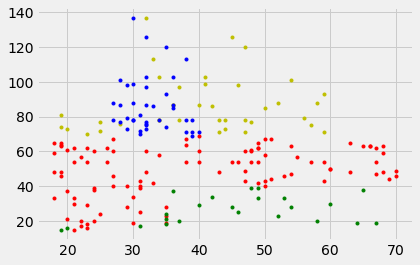

In [36]:
plt.plot(df['Age'][df['Cluster2'] == 0], df['Annual_Income'][df['Cluster2'] == 0], 'r.')
plt.plot(df['Age'][df['Cluster2'] == 1], df['Annual_Income'][df['Cluster2'] == 1], 'y.')
plt.plot(df['Age'][df['Cluster2'] == 2], df['Annual_Income'][df['Cluster2'] == 2], 'b.')
plt.plot(df['Age'][df['Cluster2'] == 3], df['Annual_Income'][df['Cluster2'] == 3], 'g.')

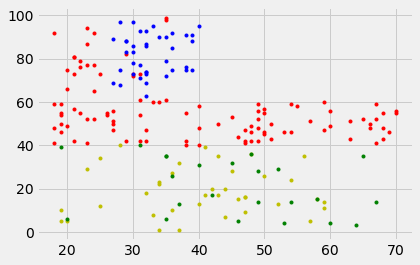

In [37]:
plt.plot(df['Age'][df['Cluster2'] == 0], df['Spending_Score'][df['Cluster2'] == 0], 'r.')
plt.plot(df['Age'][df['Cluster2'] == 1], df['Spending_Score'][df['Cluster2'] == 1], 'y.')
plt.plot(df['Age'][df['Cluster2'] == 2], df['Spending_Score'][df['Cluster2'] == 2], 'b.')
plt.plot(df['Age'][df['Cluster2'] == 3], df['Spending_Score'][df['Cluster2'] == 3], 'g.')

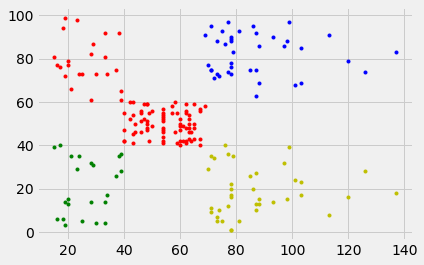

In [38]:
plt.plot(df['Annual_Income'][df['Cluster2'] == 0], df['Spending_Score'][df['Cluster2'] == 0], 'r.')
plt.plot(df['Annual_Income'][df['Cluster2'] == 1], df['Spending_Score'][df['Cluster2'] == 1], 'y.')
plt.plot(df['Annual_Income'][df['Cluster2'] == 2], df['Spending_Score'][df['Cluster2'] == 2], 'b.')
plt.plot(df['Annual_Income'][df['Cluster2'] == 3], df['Spending_Score'][df['Cluster2'] == 3], 'g.')